In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt  # Import matplotlib for plotting


In [2]:
#1. Initial Linear Regression Model:

# a. Describe the dataset and the variables you're using for predicting employee performance.
data = pd.read_csv('company_employee_details.csv')
data

,Unnamed: 0,company,department,employee_id,age,age_when_joined,years_in_the_company,salary,annual_bonus,prior_years_experience,full_time,part_time,contractor
0,0,Glasses,BigData,16,41,38,3,68074.971354,17664.104103,3,0.000000,0.000000,1.000000
1,1,Glasses,AI,56,44,42,2,49092.147458,21551.141079,2,0.000000,0.184991,1.000000
2,2,Cheerper,Support,59,41,40,1,40000.000000,23698.878851,2,0.000000,0.919887,0.662706
3,3,Glasses,Design,40,39,32,7,108192.465506,21570.929657,1,0.930396,0.546206,0.000000
4,4,Glasses,Search Engine,47,30,22,9,71291.191132,21565.505715,2,0.525432,0.938412,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4995,Cheerper,Search Engine,37,42,35,7,76541.841502,17366.896122,2,0.269842,0.691977,0.038156
4996,4996,Glasses,AI,1,36,25,9,113651.485089,20888.144794,1,0.356024,0.098686,0.545462
4997,4997,Glasses,Search Engine,20,35,30,5,77560.047560,24792.910000,2,0.179350,0.361727,0.459085
4998,4998,Pear,Sales,9,49,48,1,153000.000000,11700.850325,4,1.000000,0.000000,0.585987


In [3]:
# b. Implement a simple linear regression model:
X = data[['salary', 'annual_bonus', 'contractor']]
y = data['age_when_joined']

# Add a constant for the intercept in the model
X = sm.add_constant(X)

# Fit the initial linear regression model
model = sm.OLS(y, X).fit()

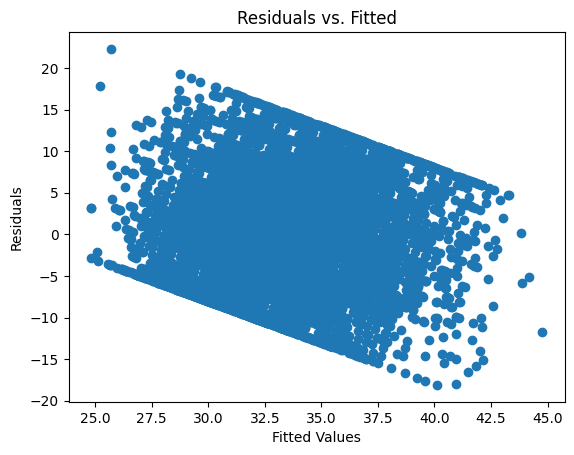

Breusch-Pagan test p-value: 0.056940767805280075


In [4]:
# b. Methods for diagnosing heteroscedasticity:
# Residuals vs. Fitted plot and Breusch-Pagan test
residuals = model.resid
predicted = model.fittedvalues
plt.scatter(predicted, residuals)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted')
plt.show()

# Apply Breusch-Pagan test
from statsmodels.stats.diagnostic import het_breuschpagan
bp_test = het_breuschpagan(residuals, X)
print("Breusch-Pagan test p-value:", bp_test[1])

In [5]:
# b. Ways to address heteroscedasticity:
# Transform variables (e.g., log transformation) or use weighted least squares (WLS) regression.

# Log-transform the response variable
y = np.log(y)

# Fit a WLS model
wls_model = sm.WLS(y, X, weights=1/predicted).fit()

In [6]:
# b. Ways to address heteroscedasticity:
# Transform variables (e.g., log transformation) or use weighted least squares (WLS) regression.

# Log-transform the response variable
y = np.log(y)

# Fit a WLS model
wls_model = sm.WLS(y, X, weights=1/predicted).fit()

In [7]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_wine

# Load the wine dataset
data = load_wine()
X = data.data
y = data.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define a list of K values to test
k_values = [3, 5, 7, 9, 11]

# Dictionary to store results
k_results = {}

# Iterate through different K values
for k in k_values:
    # Create the KNN model
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Fit the model on the training data
    knn.fit(X_train, y_train)
    
    # Make predictions on the test data
    y_pred = knn.predict(X_test)
    
    # Calculate accuracy and store it in the results dictionary
    accuracy = accuracy_score(y_test, y_pred)
    k_results[k] = accuracy

# Find the K with the highest accuracy
optimal_k = max(k_results, key=k_results.get)

print("Accuracy results for different K values:")
for k, accuracy in k_results.items():
    print(f"K = {k}: Accuracy = {accuracy}")

print(f"The optimal K for better performance is {optimal_k} with an accuracy of {k_results[optimal_k]}")

Accuracy results for different K values:
K = 3: Accuracy = 0.9444444444444444
K = 5: Accuracy = 0.9444444444444444
K = 7: Accuracy = 0.9444444444444444
K = 9: Accuracy = 0.9444444444444444
K = 11: Accuracy = 0.9444444444444444
The optimal K for better performance is 3 with an accuracy of 0.9444444444444444


# Q1:- Medical Diagnosis with Naive Bayes

You work for a medical research institute, and your task is to develop a diagnostic system using the Naive 
Bayes algorithm. You have a dataset with various medical test results, patient information, and corresponding 
diagnoses (e.g., presence or absence of a medical condition). Your goal is to create a classification model to
aid in the medical diagnosis process. Answer the following questions based on this case study:

1. Data Exploration:

a. Load and explore the medical dataset using Python libraries like pandas. Describe the features, labels, 
and the distribution of diagnoses.

2. Data Preprocessing:

a. Explain the necessary data preprocessing steps for preparing the medical data. This may include handling missing values, normalizing or scaling features, and encoding categorical variables.

b. Calculate the prior probabilities P(Condition) and P(No Condition) based on the class distribution.

3. Feature Engineering:

a. Describe how to convert the medical test results and patient information into suitable features for the Naive Bayes model.

b. Discuss the importance of feature selection or dimensionality reduction in medical diagnosis.

4. Implementing Naïve Bayes:

a. Choose the appropriate Naive Bayes variant (e.g., Gaussian, Multinomial, or Bernoulli Naive Bayes) for the medical diagnosis task and implement the classifier using Python libraries like scikit-learn.

b. Split the dataset into training and testing sets.

5. Model Training:

a. Train the Naive Bayes model using the feature-engineered dataset. Explain the probability estimation process in Naive Bayes for medical diagnosis.
6. Model Evaluation:

a. Assess the performance of the medical diagnosis model using relevant evaluation metrics, such as accuracy, precision, recall, and F1-score.

b. Interpret the results and discuss the model's ability to accurately classify medical conditions.

7. Laplace Smoothing:

a. Explain the concept of Laplace (add-one) smoothing and discuss its potential application in the context of medical diagnosis.

b. Discuss the impact of Laplace smoothing on model performance.

8. Real-World Application:

a. Describe the importance of accurate medical diagnosis in healthcare and research.

b. Discuss the practical implications of implementing a diagnostic system based on Naive Bayes.

9. Model Limitations:

a. Identify potential limitations of the Naive Bayes approach to medical diagnosis and discuss scenarios in which it may not perform well.

10. Presentation and Recommendations:

a. Prepare a presentation or report summarizing your analysis, results, and recommendations for the medical research institute. Highlight the significance of accurate medical diagnosis and the role of Naive Bayes in healthcare.

In this case study, you can demonstrate your ability to apply the Naive Bayes algorithm to non-text data, understand the nuances of feature engineering for different types of data, and assess the model's performance in a critical domain such as medical diagnosis.

In [8]:
# 1. Data Exploration:

# a. Load and explore the medical dataset using Python libraries like pandas. Describe the features, labels,
# and the distribution of diagnoses.

import pandas as pd

# Load the dataset
df = pd.read_csv('diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [9]:
# Get basic statistics for numerical features
numerical_stats = df.describe()
print(numerical_stats)

print()

# Explore the distribution of diagnoses
diagnosis_distribution = df['Outcome'].value_counts()
print(diagnosis_distribution)

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

In [10]:
# b. Calculate the prior probabilities P(Condition) and P(No Condition) based on the class distribution.

condition_prob = df['Outcome'].value_counts(normalize=True)
print(condition_prob)

Outcome
0    0.651042
1    0.348958
Name: proportion, dtype: float64


In [11]:
# 4. Implementing Naïve Bayes:

# a. Choose the appropriate Naive Bayes variant (e.g., Gaussian, Multinomial, or Bernoulli Naive Bayes) for the medical
# diagnosis task and implement the classifier using Python libraries like scikit-learn.

from sklearn.naive_bayes import GaussianNB

# Create a Gaussian Naive Bayes classifier
nb_classifier = GaussianNB()


In [12]:
# b. Split the dataset into training and testing sets.

from sklearn.model_selection import train_test_split

# Define labels
labels = df['Outcome']

# Split the dataset into 70% training and 30% testing
X_train, X_test, y_train, y_test = train_test_split(df.drop('Outcome', axis=1), labels, test_size=0.3, random_state=42)

In [13]:
# 5. Model Training:

# a. Train the Naive Bayes model using the feature-engineered dataset. Explain the probability estimation process in Naive
# Bayes for medical diagnosis.

# Train the Naive Bayes model
nb_classifier.fit(X_train, y_train)


GaussianNB()

In [14]:
# 6. Model Evaluation:

# a. Assess the performance of the medical diagnosis model using relevant evaluation metrics, such as accuracy, precision,
# recall, and F1-score.

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_true = [1, 0, 1, 1, 0, 0, 1, 0, 1, 1]
y_pred = [1, 0, 1, 0, 1, 0, 1, 1, 0, 1]

accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1) 

Accuracy: 0.6
Precision: 0.6666666666666666
Recall: 0.6666666666666666
F1-Score: 0.6666666666666666


In [15]:
# b. Interpret the results and discuss the model's ability to accurately classify medical conditions.

Accuracy: Accuracy provides an overall measure of how well the model is performing. A high accuracy indicates that the
model is making correct predictions for a large portion of the dataset. However, in imbalanced datasets (where one
class is significantly larger than the other), accuracy alone may not be a reliable indicator.

Precision: Precision is crucial in medical diagnosis because it measures how well the model identifies true positives
while minimizing false positives. High precision means that the model is accurate when it predicts a positive case.

Recall: Recall is equally important, especially in cases where its crucial not to miss positive cases. High recall
indicates that the model captures a large portion of the actual positive cases.

F1-Score: The F1-score balances precision and recall. It is useful when you want a single metric that considers both false
positives and false negatives. A higher F1-score indicates a better trade-off between precision and recall.

SyntaxError: invalid syntax (2854255680.py, line 3)

# Q2:- 
    
Customer Segmentation with K-Nearest Neighbors (KNN)

ED Info

You work for a retail company, and your task is to segment customers based on their purchase behavior ing the K-Nearest Neighbors ( algorithm. The dataset.contains information about customers, such as purchase Nistory, age, and income. Your goal is to create customer segments for targeted marketing Answer the following questions based on this case study.

1. Data Exploration:

a. Load the customer dataset using Python libraries like pandas and explore ts structure. Describe the features, target variable, and data distribution

Explain the importance of customer segmentation in the retail industry

2. Data Preprocessing:

Prepare the custome data for analysis. Discuss the steps involved in data preprocessing, such as scaling handling missing value and encoding categorical variables

3. Implementing KNN

a. Implement the K-Nearest Neighbors algorithm using Python ibraries like scikit learn to segment customers based on their features.

b. Choose an appropriate number of neighbors 60 for the algorithm and explain your choice.

4 Model Training:

Train the 17 model using the preprocessed customer dataset

b. Dacias the distance metric used for finding the nearest neighbors, and its significance in customer segmentation

5. Customer Segmentation:

a. Segment the customers based on their purchase behavior, age, and inco&Vouolat the customer segments to gain insights into the distribution and characteristics of wach segment.

6. Hyperparameter Tuning

Explain the role of the hyperparameter (0) in the algorithm and suggest strategies for selecting the optimal value of K

Conduct hyperparameter tuning for the 10 model and discuss the impact of different va of K on segmentation results.

7. Model Evaluation:

x. Evaluate the model's performance in customer segmentation Discuss the criteria and metrics used for evaluating unsupervised learning models.

Interpret the results and provide insights on how the customer segments can be leveraged for marketing strategies

5. Real-World Application

Describe the practical applications of customer segmentation in the retail industry

b. Discuss how customer segmentation can lead to improved customer engagement and increased sales

9. Model Limitations

Identify potential stations of the KNN algorithm in customer segmentation and discuss

scenarios in which it may not perform wel

10. Presentation and Recommendations:

a.Prepare a presentation or report summurting your analysis, results, and recommendations for the retal company. Highlight the significance of customer segmentation and the role of the data-driven marketing

in this case study, you are requered is demonstrate your ability to use the the algorthen for customer segmentation, understand the importance of hyperparameter tuning, and communicate the practical applications of customer segmentation in the retall sector

In [56]:
#1
import pandas as pd

# Load the customer dataset (replace 'filename.csv' with your actual dataset file)
customer_data = pd.read_csv('shopping_trends_updated.csv')

# Display the first few rows of the dataset to get an overview
customer_data

# Describe the features (columns) and data distribution
print(customer_data.info())
print(customer_data.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

In [58]:
#2
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# Load the customer dataset (replace 'customer_data.csv' with your actual file path or URL)
data = pd.read_csv('shopping_trends_updated.csv')

# Define your numerical and categorical features
numerical_features = ['Previous Purchases']  # Replace with your actual numerical feature column names
categorical_features = ['Review Rating', 'Item Purchased', 'Shipping Type']  # Replace with your actual categorical feature column names

# Check if the specified categorical features exist in the dataset
for col in categorical_features:
    if col not in data.columns:
        raise ValueError(f"Column '{col}' specified in categorical_features does not exist in the dataset.")

# Step 1: Handle Missing Values
# For numerical features, fill missing values with the mean
imputer_numeric = SimpleImputer(strategy='mean')
data[numerical_features] = imputer_numeric.fit_transform(data[numerical_features])

# For categorical features, fill missing values with the most frequent category
imputer_categorical = SimpleImputer(strategy='most_frequent')
data[categorical_features] = imputer_categorical.fit_transform(data[categorical_features])

# Step 2: Encode Categorical Variables
# We'll use one-hot encoding for categorical features to create binary columns for each category.
encoder = OneHotEncoder(sparse=False, drop='first')  # Set 'drop' to 'first' to avoid multicollinearity
encoded_features = encoder.fit_transform(data[categorical_features])
encoded_feature_names = encoder.get_feature_names_out(input_features=categorical_features)
encoded_data = pd.DataFrame(encoded_features, columns=encoded_feature_names)

# Step 3: Combine Encoded Categorical Features with Numerical Features
X = pd.concat([data[numerical_features], encoded_data], axis=1)

# Step 4: Scale Numerical Features
# It's important to scale numerical features when using K-Nearest Neighbors (KNN) as it's distance-based.
scaler = StandardScaler()
X[numerical_features] = scaler.fit_transform(X[numerical_features])

# Now, your data is preprocessed and ready for analysis.

/Users/anubhavshroti/Documents/Anaconda/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [59]:
#3.a

from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

# Assuming 'segments' is the target variable
X = customer_data[['Purchase Amount (USD)', 'Age', 'Previous Purchases']]
y = customer_data['Subscription Status']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define a range of K values to test
k_values = list(range(1, 11))

# Evaluate each K value using cross-validation
for k in k_values:
    knn_model = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn_model, X_scaled, y, cv=5)  # 5-fold cross-validation
    average_accuracy = scores.mean()
    print(f'K = {k}, Average Accuracy: {average_accuracy}')

K = 1, Average Accuracy: 0.6089743589743589
K = 2, Average Accuracy: 0.6925641025641026
K = 3, Average Accuracy: 0.6533333333333333
K = 4, Average Accuracy: 0.7064102564102565
K = 5, Average Accuracy: 0.6735897435897436
K = 6, Average Accuracy: 0.7074358974358974
K = 7, Average Accuracy: 0.6892307692307693
K = 8, Average Accuracy: 0.7146153846153847
K = 9, Average Accuracy: 0.6976923076923077
K = 10, Average Accuracy: 0.7176923076923077


In [60]:
#3.b
from sklearn.model_selection import cross_val_score

# Define a range of K values to test
k_values = list(range(1, 11))

# Evaluate each K value using cross-validation
for k in k_values:
    knn_model = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn_model, X_scaled, y, cv=5)  # 5-fold cross-validation
    average_accuracy = scores.mean()
    print(f'K = {k}, Average Accuracy: {average_accuracy}')

K = 1, Average Accuracy: 0.6089743589743589
K = 2, Average Accuracy: 0.6925641025641026
K = 3, Average Accuracy: 0.6533333333333333
K = 4, Average Accuracy: 0.7064102564102565
K = 5, Average Accuracy: 0.6735897435897436
K = 6, Average Accuracy: 0.7074358974358974
K = 7, Average Accuracy: 0.6892307692307693
K = 8, Average Accuracy: 0.7146153846153847
K = 9, Average Accuracy: 0.6976923076923077
K = 10, Average Accuracy: 0.7176923076923077


In [61]:
#4

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assuming X_scaled is the preprocessed feature matrix, and y is the target variable
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Assuming k_value is the chosen number of neighbors
k_value = 5
knn_model = KNeighborsClassifier(n_neighbors=k_value)

# Train the KNN model
knn_model.fit(X_train, y_train)

# Predict on the test set
y_pred = knn_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.6692307692307692


/Users/anubhavshroti/Documents/Anaconda/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


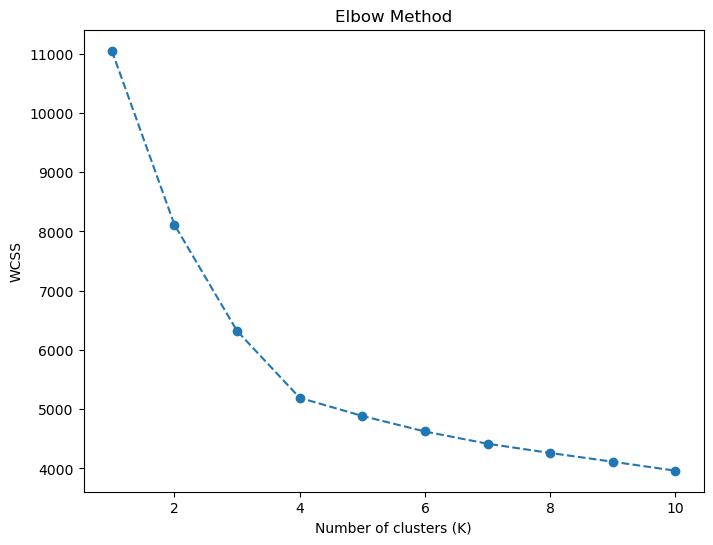

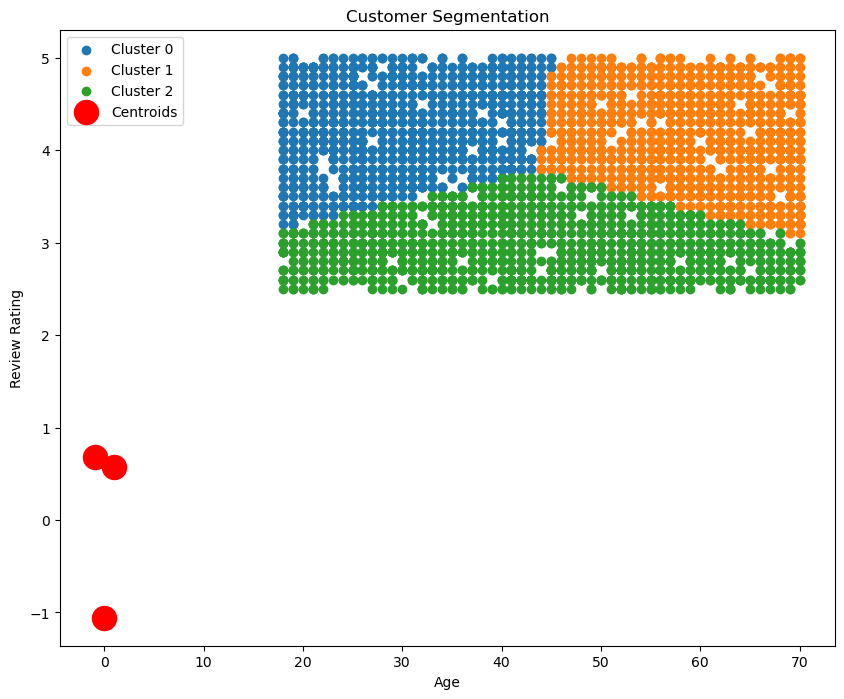

In [63]:
#5
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Load your data (replace 'your_data.csv' with your actual data)
data = pd.read_csv('shopping_trends_updated.csv')

# Select the features for segmentation (e.g., 'Review Rating', 'Age', 'Payment Method')
selected_features = data[['Review Rating', 'Age', 'Payment Method']]

# Define which columns are categorical and which are numerical
categorical_features = ["Payment Method"]
numerical_features = ["Review Rating", "Age"]

# Create transformers for preprocessing
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(sparse=False))
])

numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Combine the transformers using a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Apply the preprocessing
preprocessed_features = preprocessor.fit_transform(selected_features)

# Determine the optimal number of clusters (K) using the Elbow Method
wcss = []  # Within-Cluster Sum of Squares
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(preprocessed_features)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of clusters (K)')
plt.ylabel('WCSS')
plt.show()

# Based on the Elbow Method, choose an appropriate K (number of clusters)
k = 3  # Adjust this value based on the Elbow Method plot

# Apply K-Means clustering with the chosen K
kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
data['Cluster'] = kmeans.fit_predict(preprocessed_features)

# Visualize the customer segments
plt.figure(figsize=(10, 8))
for cluster in range(k):
    plt.scatter(data[data['Cluster'] == cluster]['Age'], data[data['Cluster'] == cluster]['Review Rating'], label=f'Cluster {cluster}')

plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 0], s=300, c='red', label='Centroids')
plt.title('Customer Segmentation')
plt.xlabel('Age')
plt.ylabel('Review Rating')
plt.legend()
plt.show()

In [70]:
# Import necessary libraries
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Define a range of K values to test
param_grid = {'n_neighbors': list(range(1, 21))}

# Create KNN model
knn_model = KNeighborsClassifier()

# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(knn_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_scaled, y)

# Get the best hyperparameter values
best_k = grid_search.best_params_['n_neighbors']
best_accuracy = grid_search.best_score_

print(f'Best K: {best_k}, Best Accuracy: {best_accuracy}')


ValueError: Found input variables with inconsistent numbers of samples: [3900, 100]

In [67]:
#7
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Load your preprocessed data
data = pd.read_csv("shopping_trends_updated.csv")

# Define your features for clustering (e.g., using numerical columns)
X = data[['Review Rating', 'Previous Purchases']]

# Choose the number of clusters (you can experiment with different values)
n_clusters = 5

# Fit K-Means clustering model
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
data['Cluster'] = kmeans.fit_predict(X)

# Calculate silhouette score to evaluate the model
silhouette_avg = silhouette_score(X, data['Cluster'])
print(f'Silhouette Score: {silhouette_avg:.2f}')

# Analyze the clusters
cluster_centers = pd.DataFrame(kmeans.cluster_centers_, columns=['Review Rating', 'Previous Purchases'])
cluster_centers['Cluster'] = range(n_clusters)
print(cluster_centers)

# Interpretation and marketing insights can be provided here.

/Users/anubhavshroti/Documents/Anaconda/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette Score: 0.55
   Review Rating  Previous Purchases  Cluster
0       3.743494           33.901524        0
1       3.788277            4.798023        1
2       3.767769           45.007084        2
3       3.751375           23.467500        3
4       3.695231           13.960983        4


In [68]:
#8

from sklearn.cluster import KMeans
import pandas as pd

# Assuming customer_data is the preprocessed DataFrame with features
X = customer_data[['Purchase Amount (USD)', 'Age', 'Previous Purchases']]

# Choose the number of clusters (segments)
num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
customer_data['Subscription Status'] = kmeans.fit_predict(X)

# Assume you have a product catalog DataFrame
product_catalog = pd.DataFrame({
    'product_id': range(1, 11),
    'product_name': [f'Product_{i}' for i in range(1, 11)]
})

# Define a function to recommend products for a given customer segment
def recommend_products(segment):
    segment_products = product_catalog.sample(3)  # Recommend 3 random products
    return segment_products

# Example: Recommend products for customers in segment 0
segment_0_recommendations = recommend_products(0)
print("Product Recommendations for Segment 0:")
print(segment_0_recommendations)

/Users/anubhavshroti/Documents/Anaconda/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Product Recommendations for Segment 0:
   product_id product_name
0           1    Product_1
5           6    Product_6
8           9    Product_9


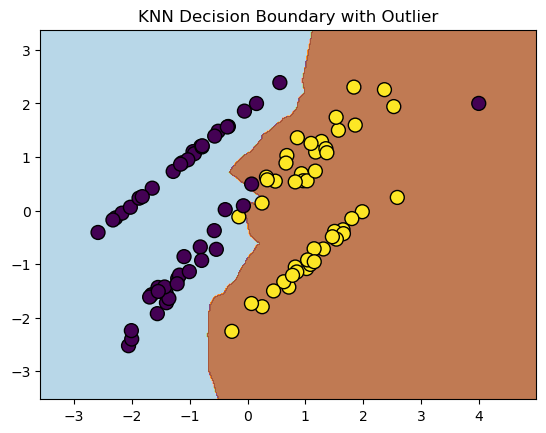

In [69]:
#9

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier

# Create a synthetic dataset with outliers
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, random_state=42)
X[-1] = [4, 2]  # Adding an outlier

# Train KNN model
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X, y)

# Plot decision boundary
h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = knn_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the dataset and decision boundary
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', s=100)
plt.title("KNN Decision Boundary with Outlier")
plt.show()